# Deutsch Algorithm

> In 1992, David Deutsch (Fig. 10.4) and Richard Jozsa discovered the ﬁrst problem that a quantum computer could solve in fewer steps than a classical computer [1]. The quantum algorithm, known as Deutsch’s algorithm or the Deutsch-Jozsa algorithm, **has no practical signiﬁcance, but it demonstrates in principle how quantum computers can be better than classical computers.**
> - From  "Introduction to Quantum Computing" (Ray LaPierre)

Code adapted from [QX07-DeutschAlgorithm/QX07-DeutschAlgorithm.ipynb at main · atilsamancioglu/QX07-DeutschAlgorithm](https://github.com/atilsamancioglu/QX07-DeutschAlgorithm/blob/main/QX07-DeutschAlgorithm.ipynb)

In [2]:
import sys
sys.path.append("../utils")

from qiskit import *

# import job watcher packages
import qiskit.tools.jupyter
%qiskit_job_watcher
from qiskit.tools.monitor import job_monitor

from qiskit.tools.visualization import plot_histogram
from dotenv import dotenv_values
%matplotlib inline

from qiskit_utils import *

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

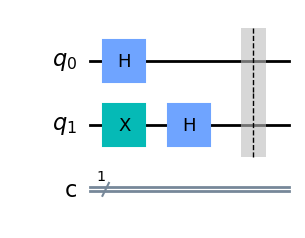

In [3]:
circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

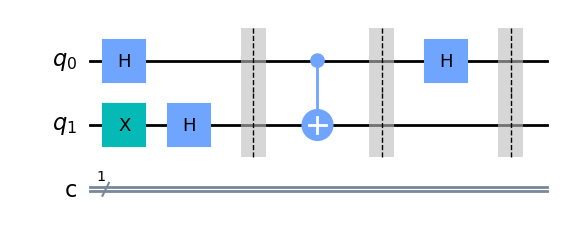

In [4]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
circuit.measure(0,0)


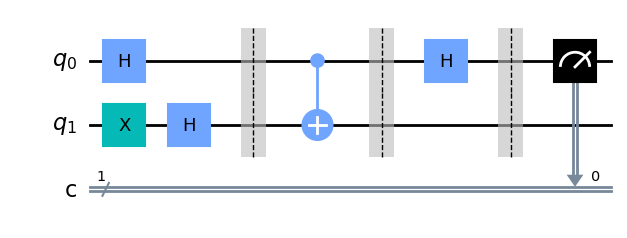

In [6]:
circuit.draw(output='mpl')

## Run on simulator

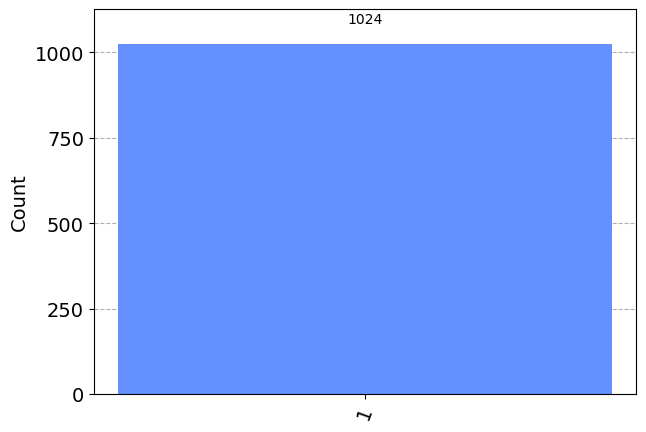

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

## Run on actual quantum computer

In [8]:
config = dotenv_values("../.env")

IBMQ.save_account(config["QISKIT_API_TOKEN"])

/var/folders/pn/qz12b_x55lx3hjqmrpty0b_00000gn/T/ipykernel_71754/3201106749.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(config["QISKIT_API_TOKEN"])
configrc.store_credentials:WARNING:2023-07-11 23:25:16,582: Credentials already present. Set overwrite=True to overwrite.


In [9]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider("ibm-q")

In [11]:
get_status(provider)

ibmq_qasm_simulator : 0 & simulated qubits
ibmq_lima : 66 & 5 qubits
ibmq_belem : 62 & 5 qubits
ibmq_quito : 63 & 5 qubits
simulator_statevector : 0 & simulated qubits
simulator_mps : 0 & simulated qubits
simulator_extended_stabilizer : 0 & simulated qubits
simulator_stabilizer : 0 & simulated qubits
ibmq_jakarta : 58 & 7 qubits
ibmq_manila : 55 & 5 qubits
ibm_lagos : 344 & 7 qubits
ibm_nairobi : 3554 & 7 qubits
ibm_perth : 115 & 7 qubits


In [12]:
quantum_computer = provider.get_backend('ibmq_manila')

In [14]:
import qiskit.tools.jupyter
%qiskit_job_watcher

job = execute(circuit, backend=quantum_computer,shots=1024).result()

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)